In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Лабораторная работа 4.1
### Численные методы решения задачи Коши

In [2]:
def euler_method(f, y_0, dy_0, h, left_x, right_x):
    x = np.arange(left_x, right_x+h, h)
    y = np.empty_like(x)
    z = np.empty_like(x)
    y[0] = y_0
    z[0] = dy_0

    for i in range(1, len(x)):
        z[i] = z[i-1]+h*f(x[i-1], y[i-1], z[i-1])
        y[i] = y[i-1]+h*z[i-1]

    return x, y

$x^2y''+xy'-y-3x^2=0$

$y''=\frac{-xy'+y+3x^2}{x^2}$

$
 \begin{cases}
   y'=z \\
   z'=\frac{-xz+y+3x^2}{x^2}
 \end{cases}
$

In [3]:
def true_y(x):
    return x**2+x+(1/x)

In [4]:
def f(x, y, z):
    return (-x*z+y+3*x**2)/(x**2)

y_0 = 3
dy_0 = 2
left_x = 1
right_x = 2
h = 0.1

x, y = euler_method(f, y_0, dy_0, h, left_x, right_x)

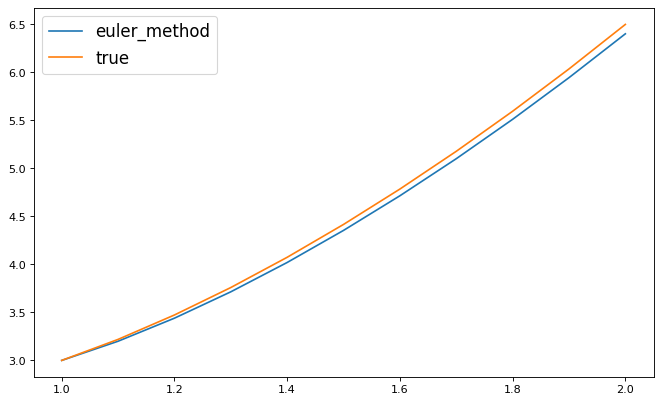

In [5]:
x = np.arange(left_x, right_x+h, h)

plt.figure(figsize=(10, 6), dpi=80)
plt.plot(x, y, label = 'euler_method')
plt.plot(x, true_y(x), label = 'true')
plt.legend(loc=0, prop={'size': 15})
plt.show()

In [6]:
def runge_kutti_method(f, y_0, dy_0, h, left_x, right_x):
    x = np.arange(left_x, right_x+h, h)
    y = np.empty_like(x)
    z = np.empty_like(x)
    y[0] = y_0
    z[0] = dy_0

    for i in range(1, len(x)):
        K1 = h*z[i-1]
        L1 = h*f(x[i-1], y[i-1], z[i-1])
        K2 = h*(z[i-1]+(1/2)*L1)
        L2 = h*f(x[i-1]+(1/2)*h, y[i-1]*(1/2)*K1, z[i-1]+(1/2)*L1)
        K3 = h*(z[i-1]+(1/2)*L2)
        L3 = h*f(x[i-1]+(1/2)*h, y[i-1]+(1/2)*K2, z[i-1]+(1/2)*L2)
        K4 = h*(z[i-1]+L3)
        L4 = h*f(x[i-1]+h, y[i-1]+K3, z[i-1]+L3)

        delta_y = (1/6)*(K1+2*K2+2*K3+K4)
        delta_z = (1/6)*(L1+2*L2+2*L3+L4)

        y[i] = y[i-1]+delta_y
        z[i] = z[i-1]+delta_z

    return x, y

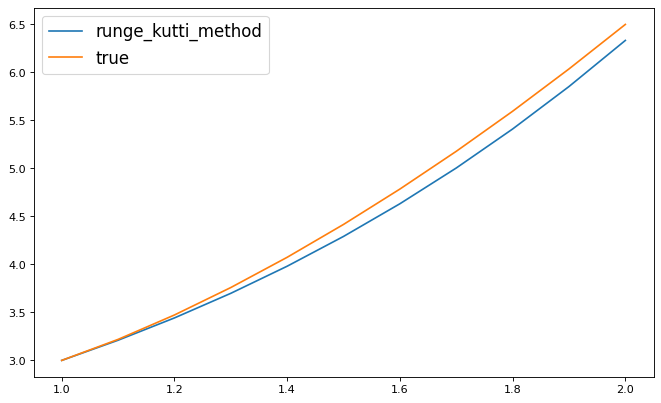

In [8]:
def f(x, y, z):
    return (2*x*z)/(x**2+1)

y_0 = 3
dy_0 = 2
left_x = 1
right_x = 2
h = 0.1

x, y = runge_kutti_method(f, y_0, dy_0, h, left_x, right_x)

plt.figure(figsize=(10, 6), dpi=80)
plt.plot(x, y, label = 'runge_kutti_method')
plt.plot(x, true_y(x), label = 'true')
plt.legend(loc=0, prop={'size': 15})
plt.show()

Погрешность метода Рунге-Кутты

In [21]:
e = abs(y-true_y(x))
e

array([0.        , 0.00875778, 0.0306671 , 0.06023145, 0.10628647,
       0.15266751, 0.19600093, 0.23323633, 0.2615567 , 0.27831705,
       0.28100139])

In [17]:
def runge_kutti_method(f, y_0, dy_0, h, left_x, right_x):
    x = np.arange(left_x, right_x+h, h)
    y = np.empty_like(x)
    z = np.empty_like(x)
    y[0] = y_0
    z[0] = dy_0

    for i in range(1, len(x)):
        K1 = h*z[i-1]
        L1 = h*f(x[i-1], y[i-1], z[i-1])
        K2 = h*(z[i-1]+(1/2)*L1)
        L2 = h*f(x[i-1]+(1/2)*h, y[i-1]*(1/2)*K1, z[i-1]+(1/2)*L1)
        K3 = h*(z[i-1]+(1/2)*L2)
        L3 = h*f(x[i-1]+(1/2)*h, y[i-1]+(1/2)*K2, z[i-1]+(1/2)*L2)
        K4 = h*(z[i-1]+L3)
        L4 = h*f(x[i-1]+h, y[i-1]+K3, z[i-1]+L3)

        delta_y = (1/6)*(K1+2*K2+2*K3+K4)
        delta_z = (1/6)*(L1+2*L2+2*L3+L4)

        y[i] = y[i-1]+delta_y
        z[i] = z[i-1]+delta_z

    return y, z

def adams_method(f, y_0, dy_0, h, left_x, right_x):

    start_y, start_z = runge_kutti_method(f, y_0, dy_0, h, left_x, left_x+2*h)

    x = np.arange(left_x, right_x+h, h)
    y = np.empty_like(x)
    z = np.empty_like(x)
    y[0] = y_0
    z[0] = dy_0

    for i in range(1, 4):
        y[i] = start_y[i]
        z[i] = start_z[i]

    for i in range(4, len(x)):
        z[i] = z[i-1]+(h/24)*(55*f(x[i-1], y[i-1], z[i-1])-59*f(x[i-2], y[i-2], z[i-2])+37*f(x[i-3], y[i-3], z[i-3])-9*f(x[i-4], y[i-4], z[i-4]) )
        y[i] = y[i-1]+h*z[i-1]

    return x, y

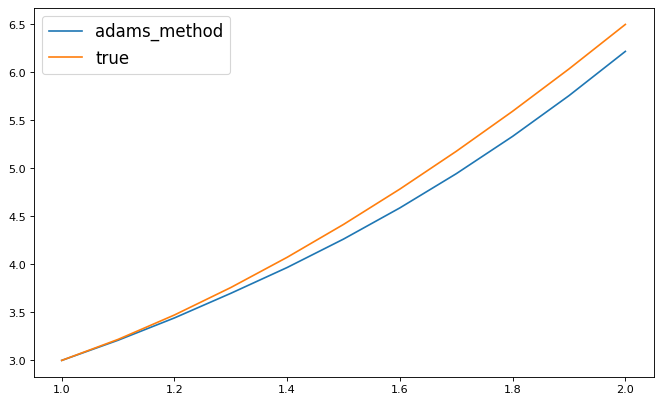

In [18]:
def f(x, y, z):
    return (2*x*z)/(x**2+1)

y_0 = 3
dy_0 = 2
left_x = 1
right_x = 2
h = 0.1

x, y = adams_method(f, y_0, dy_0, h, left_x, right_x)

plt.figure(figsize=(10, 6), dpi=80)
plt.plot(x, y, label = 'adams_method')
plt.plot(x, true_y(x), label = 'true')
plt.legend(loc=0, prop={'size': 15})
plt.show()

# Лабораторная работа 4.2
### Численные методы решение краевой задачи для ОДУ